In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Titanic.csv")

In [3]:
data

,ID,Class,Sex,Age,Survived
0,1,1st,Male,Child,Yes
1,2,1st,Male,Child,Yes
2,3,1st,Male,Child,Yes
3,4,1st,Male,Child,Yes
4,5,1st,Male,Child,Yes
...,...,...,...,...,...
2196,2197,Crew,Female,Adult,Yes
2197,2198,Crew,Female,Adult,Yes
2198,2199,Crew,Female,Adult,Yes
2199,2200,Crew,Female,Adult,Yes


In [4]:
data.values

array([[1, '1st', 'Male', 'Child', 'Yes'],
       [2, '1st', 'Male', 'Child', 'Yes'],
       [3, '1st', 'Male', 'Child', 'Yes'],
       ...,
       [2199, 'Crew', 'Female', 'Adult', 'Yes'],
       [2200, 'Crew', 'Female', 'Adult', 'Yes'],
       [2201, 'Crew', 'Female', 'Adult', 'Yes']], dtype=object)

In [5]:
ndata = data.values

In [6]:
nndata = ndata[:,1:]

In [7]:
nndata[1].size

4

In [8]:
nndata.size

8804

In [9]:
col,row = nndata.shape

In [10]:
col

2201

In [11]:
nmap = {}
for i in range(col):
    tem = ""
    for j in range (nndata[i].size):
        tem = tem + nndata[i][j]
    if  tem in nmap:
        nmap[tem]+=1
    else:
        nmap[tem]=1
        


In [12]:
for key,value in nmap.items():
    print(key,"  ",value)

1stMaleChildYes    5
1stMaleAdultNo    118
1stMaleAdultYes    57
1stFemaleChildYes    1
1stFemaleAdultNo    4
1stFemaleAdultYes    140
2ndMaleChildYes    11
2ndMaleAdultNo    154
2ndMaleAdultYes    14
2ndFemaleChildYes    13
2ndFemaleAdultNo    13
2ndFemaleAdultYes    80
3rdMaleChildNo    35
3rdMaleChildYes    13
3rdMaleAdultNo    387
3rdMaleAdultYes    75
3rdFemaleChildNo    17
3rdFemaleChildYes    14
3rdFemaleAdultNo    89
3rdFemaleAdultYes    76
CrewMaleAdultNo    670
CrewMaleAdultYes    192
CrewFemaleAdultNo    3
CrewFemaleAdultYes    20


In [13]:
sorted(nmap.items(),key = lambda item:item[1],reverse=True)

[('CrewMaleAdultNo', 670),
 ('3rdMaleAdultNo', 387),
 ('CrewMaleAdultYes', 192),
 ('2ndMaleAdultNo', 154),
 ('1stFemaleAdultYes', 140),
 ('1stMaleAdultNo', 118),
 ('3rdFemaleAdultNo', 89),
 ('2ndFemaleAdultYes', 80),
 ('3rdFemaleAdultYes', 76),
 ('3rdMaleAdultYes', 75),
 ('1stMaleAdultYes', 57),
 ('3rdMaleChildNo', 35),
 ('CrewFemaleAdultYes', 20),
 ('3rdFemaleChildNo', 17),
 ('2ndMaleAdultYes', 14),
 ('3rdFemaleChildYes', 14),
 ('2ndFemaleChildYes', 13),
 ('2ndFemaleAdultNo', 13),
 ('3rdMaleChildYes', 13),
 ('2ndMaleChildYes', 11),
 ('1stMaleChildYes', 5),
 ('1stFemaleAdultNo', 4),
 ('CrewFemaleAdultNo', 3),
 ('1stFemaleChildYes', 1)]

In [14]:
bmap = {"Class":0,"Sex":1,"Age":2,"Survived":3} 

In [15]:
def countC(types,values):
    index = []
    bmap = {"Class":0,"Sex":1,"Age":2,"Survived":3} 
    for type in types:
        index.append(bmap[type])
    count = 0
    col,row = nndata.shape
    for i in range(col):
        b = True
        for j in range(len(index)):
            if nndata[i][index[j]] != values[j]:
                b = False
                break
        if b:
            count = count + 1
    return count

In [16]:
countC(["Sex"],["Male"])

1731

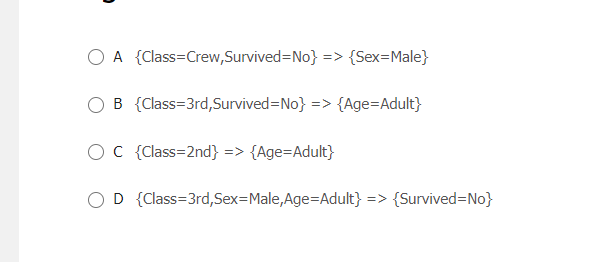

#   A  t(a) = Fre(q)/Fre(hh)  / Fre(f)

In [17]:
col,row = nndata.shape

In [18]:
col

2201

In [19]:
q = countC(["Class","Survived","Sex"],["Crew","No","Male"])
hh = countC(["Class","Survived"],["Crew","No"])
h = countC(["Sex"],["Male"])

In [20]:
print(q,"   ",h,"   ",hh)

670     1731     673


In [21]:
freq = q/hh

In [22]:
freq

0.9955423476968797

In [23]:
fref = h/col

In [24]:
fref

0.7864606996819627

In [25]:
freq/fref

1.265851361802907

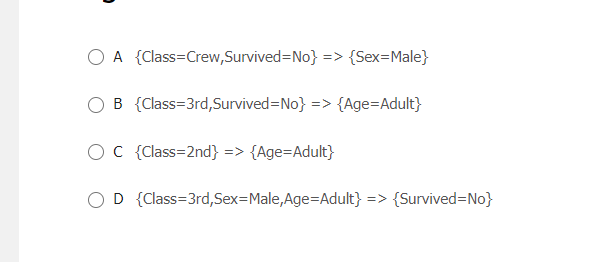

#   B  t(b)= Fre(q)/Fre(hh)  / Fre(f)

In [26]:
q = countC(["Class","Survived","Age"],["3rd","No","Adult"])
hh = countC(["Class","Survived"],["3rd","No"])
h = countC(["Age"],["Adult"])

In [27]:
freq = q/hh
fref = h/col
result = freq/fref
print(freq)
print(fref)
print(result)

0.9015151515151515
0.9504770558836892
0.9484870212642679


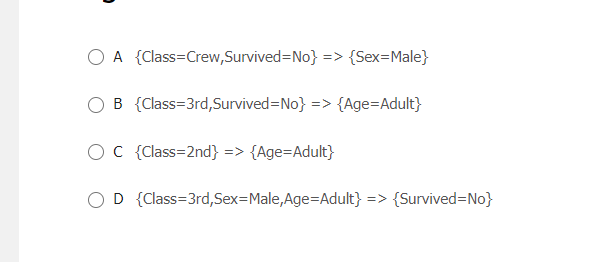

#   C  t(c)= Fre(q)/Fre(hh)  / Fre(f)

In [28]:
q = countC(["Class","Age"],["2nd","Adult"])
hh = countC(["Class"],["2nd"])
h = countC(["Age"],["Adult"])

In [29]:
freq = q/hh
fref = h/col
result = freq/fref
print(freq)
print(fref)
print(result)

0.9157894736842105
0.9504770558836892
0.9635050820167051


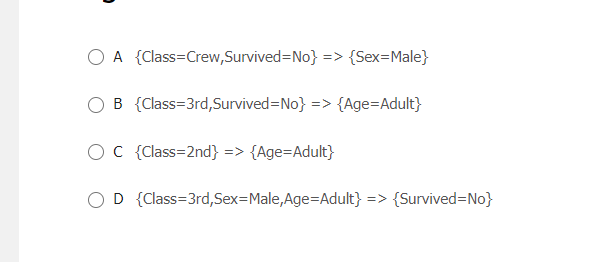

# D t(d)=  Fre(q)/Fre(hh)  / Fre(f)

In [30]:
q = countC(["Class","Sex","Age","Survived"],["3rd","Male","Adult","No"])
hh = countC(["Class","Sex","Age"],["3rd","Male","Adult"])
h = countC(["Survived"],["No"])

In [31]:
freq = q/hh
fref = h/col
result = freq/fref
print(freq)
print(fref)
print(result)

0.8376623376623377
0.6769650159018628
1.237379063889131


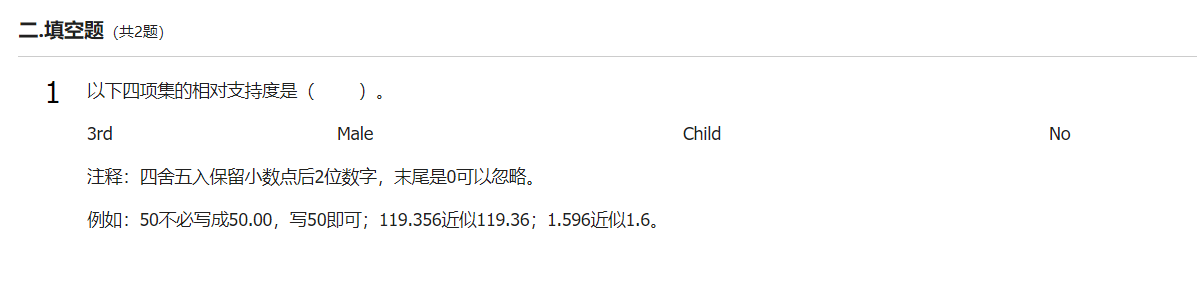

In [32]:
q = countC(["Class","Sex","Age","Survived"],["3rd","Male","Child","No"])

In [33]:
q/col

0.01590186278964107

In [34]:
q

35

In [35]:
35/2201


0.01590186278964107

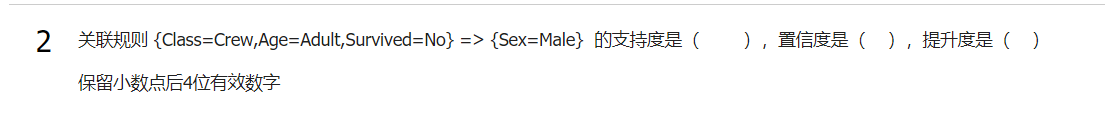

In [36]:
q = countC(["Class","Age","Survived","Sex"],["Crew","Adult","No","Male"])

In [37]:
q/col

0.3044070876874148

In [38]:
hh = countC(["Class","Age","Survived"],["Crew","Adult","No"])
h = countC(["Sex"],["Male"])

In [39]:
r = q/hh
r

0.9955423476968797

In [40]:
t = h/col
t

0.7864606996819627

In [41]:
r/t

1.265851361802907

In [42]:
clive = countC(["Age","Survived"],["Adult","Yes"])
cdead = countC(["Age","Survived"],["Adult","No"])
print(clive)
print(cdead)

654
1438


In [43]:
clive = countC(["Age","Survived"],["Child","Yes"])
cdead = countC(["Age","Survived"],["Child","No"])
print(clive)
print(cdead)

57
52


# 1st->dead/live

In [44]:
firstdead = countC(["Class","Survived"],["1st","No"])
firstlive = countC(["Class","Survived"],["1st","Yes"])
print(firstdead)
print(firstlive)

122
203


In [45]:
first = countC(["Class"],["1st"])
first

325

In [46]:
supfd = firstdead/col
supfl = firstlive/col
print(supfd)
print(supfl)

0.05542935029532031
0.09223080417991822


In [47]:
condead = firstdead/first
conlive = firstlive/first
print(condead)
print(conlive)

0.37538461538461537
0.6246153846153846


In [48]:
dead = countC(["Survived"],["No"])
live = countC(["Survived"],["Yes"])
print(dead)
print(live)

1490
711


In [49]:
supdead = dead/col
suplive = live/col
print(supdead)
print(suplive)

0.6769650159018628
0.3230349840981372


In [50]:
td = condead / supdead
tl = conlive / suplive
print(td)
print(tl)

0.5545110996386164
1.933584334090663


结论： 置信度为 0.3753  提升度为0.5545  低于先验概率 第一层的人更容易活下来

# 2nd->dead/live

In [51]:
seconddead = countC(["Class","Survived"],["2nd","No"])
secondlive = countC(["Class","Survived"],["2nd","Yes"])
print(seconddead)
print(secondlive)

167
118


In [52]:
second = countC(["Class"],["2nd"])
second

285

In [53]:
supsd = seconddead/col
supsl = secondlive/col
print(supsd)
print(supsl)

0.07587460245343026
0.05361199454793276


In [54]:
condead = seconddead/second
conlive = secondlive/second
print(condead)
print(conlive)

0.5859649122807018
0.41403508771929826


In [55]:
td = condead / supdead
tl = conlive / suplive
print(td)
print(tl)

0.8655763569998823
1.2817035556542553


结论：第二层活下来的概率会高一点

# 3rd->dead/live

In [56]:
thirddead = countC(["Class","Survived"],["3rd","No"])
thirdlive = countC(["Class","Survived"],["3rd","Yes"])
print(thirddead)
print(thirdlive)

528
178


In [57]:
third = countC(["Class"],["3rd"])
third

706

In [58]:
suptd = thirddead/col
suptl = thirdlive/col
print(suptd)
print(suptl)

0.23989095865515675
0.08087233075874603


In [59]:
condead = thirddead/third
conlive = thirdlive/third
print(condead)
print(conlive)

0.7478753541076487
0.2521246458923513


In [60]:
td = condead / supdead
tl = conlive / suplive
print(td)
print(tl)

1.1047474190543187
0.7804871246259708


结论：第三层死亡人数更多一点，可能是第三层更不容易往上走的原因

# Crew->dead/live

In [61]:
cdead = countC(["Class","Survived"],["Crew","No"])
clive = countC(["Class","Survived"],["Crew","Yes"])
print(cdead)
print(clive)

673
212


In [62]:
c = countC(["Class"],["Crew"])
c

885

In [63]:
supcd = cdead/col
supcl = clive/col
print(supcd)
print(supcl)

0.3057701044979555
0.0963198546115402


In [64]:
condead = cdead/c
conlive = clive/c
print(condead)
print(conlive)

0.7604519774011299
0.23954802259887006


In [65]:
td = condead / supdead
tl = conlive / suplive
print(td)
print(tl)

1.1233253706442194
0.7415544272012842


结论：船员死亡人数更多一点

# Child/Adult-->dead/live

In [66]:
cdead = countC(["Age","Survived"],["Child","No"])
clive = countC(["Age","Survived"],["Child","Yes"])
adead = countC(["Age","Survived"],["Adult","No"])
alive = countC(["Age","Survived"],["Adult","Yes"])
print(cdead)
print(clive)
print(adead)
print(alive)

52
57
1438
654


In [67]:
supcd = cdead/col
supcl = clive/col
supad = adead/col
supal = alive/col
print(supcd)
print(supcl)
print(supad)
print(supal)

0.023625624716038164
0.025897319400272602
0.6533393911858246
0.2971376646978646


In [68]:
child = countC(["Age"],["Child"])
adult = countC(["Age"],["Adult"])
print(child)
print(adult)

109
2092


In [69]:
ccondead = cdead/child
cconlive = clive/child
acondead = adead/adult
aconlive = alive/adult
print(ccondead)
print(cconlive)
print(acondead)
print(aconlive)

0.47706422018348627
0.5229357798165137
0.6873804971319312
0.31261950286806883


In [70]:
ctd = ccondead / supdead
ctl = cconlive / suplive
atd = acondead / supdead
atl = aconlive / suplive
print(ctd)
print(ctl)
print(atd)
print(atl)

0.7047103010898345
1.6188208880114583
1.015385553145893
0.9677574202709136


结论：孩子确实相对于大人更容易活下来

# Male/Famale->dead/live

In [71]:
cdead = countC(["Sex","Survived"],["Female","No"])
clive = countC(["Sex","Survived"],["Female","Yes"])
adead = countC(["Sex","Survived"],["Male","No"])
alive = countC(["Sex","Survived"],["Male","Yes"])
print(cdead)
print(clive)
print(adead)
print(alive)

126
344
1364
367


In [72]:
child = countC(["Sex"],["Female"])
adult = countC(["Sex"],["Male"])
print(child)
print(adult)

470
1731


In [73]:
supcd = cdead/col
supcl = clive/col
supad = adead/col
supal = alive/col
print(supcd)
print(supcl)
print(supad)
print(supal)

0.05724670604270786
0.1562925942753294
0.6197183098591549
0.1667423898228078


In [74]:
ccondead = cdead/child
cconlive = clive/child
acondead = adead/adult
aconlive = alive/adult
print(ccondead)
print(cconlive)
print(acondead)
print(aconlive)

0.2680851063829787
0.7319148936170212
0.7879838243789717
0.2120161756210283


In [75]:
ctd = ccondead / supdead
ctl = cconlive / suplive
atd = acondead / supdead
atl = aconlive / suplive
print(ctd)
print(ctl)
print(atd)
print(atl)

0.39601028130801086
2.265744980099949
1.1639948976228973
0.6563257419717066


结论：女人活下来的机率会大很多，同样相对男人死亡几率大一点也证实了这个观点

# 1st/2nd/3rd/Crew  /   Male/Female  /  Adult  -------->  live/dead

In [76]:
fmad = countC(["Class","Sex","Age","Survived"],["1st","Male","Adult","No"])
fmal = countC(["Class","Sex","Age","Survived"],["1st","Male","Adult","Yes"])
ffmad = countC(["Class","Sex","Age","Survived"],["1st","Female","Adult","No"])
ffmal = countC(["Class","Sex","Age","Survived"],["1st","Female","Adult","Yes"])
smad = countC(["Class","Sex","Age","Survived"],["2nd","Male","Adult","No"])
smal = countC(["Class","Sex","Age","Survived"],["2nd","Male","Adult","Yes"])
sfmad = countC(["Class","Sex","Age","Survived"],["2nd","Female","Adult","No"])
sfmal = countC(["Class","Sex","Age","Survived"],["2nd","Female","Adult","Yes"])
tmad = countC(["Class","Sex","Age","Survived"],["3rd","Male","Adult","No"])
tmal = countC(["Class","Sex","Age","Survived"],["3rd","Male","Adult","Yes"])
tfmad = countC(["Class","Sex","Age","Survived"],["3rd","Female","Adult","No"])
tfmal = countC(["Class","Sex","Age","Survived"],["3rd","Female","Adult","Yes"])
cmad = countC(["Class","Sex","Age","Survived"],["Crew","Male","Adult","No"])
cmal = countC(["Class","Sex","Age","Survived"],["Crew","Male","Adult","Yes"])
cfmad = countC(["Class","Sex","Age","Survived"],["Crew","Female","Adult","No"])
cfmal = countC(["Class","Sex","Age","Survived"],["Crew","Female","Adult","Yes"])
print(fmad)
print(fmal)
print(smad)
print(smal)
print(tmad)
print(tmal)
print(cmad)
print(cmal)
print("-------------------------------")
print(ffmad)
print(ffmal)
print(sfmad)
print(sfmal)
print(tfmad)
print(tfmal)
print(cfmad)
print(cfmal)

118
57
154
14
387
75
670
192
-------------------------------
4
140
13
80
89
76
3
20


In [77]:
fma = countC(["Class","Sex","Age"],["1st","Male","Adult"])
sma = countC(["Class","Sex","Age"],["2nd","Male","Adult"])
tma = countC(["Class","Sex","Age"],["3rd","Male","Adult"])
cma = countC(["Class","Sex","Age"],["Crew","Male","Adult"])
ffma = countC(["Class","Sex","Age"],["1st","Female","Adult"])
sfma = countC(["Class","Sex","Age"],["2nd","Female","Adult"])
tfma = countC(["Class","Sex","Age"],["3rd","Female","Adult"])
cfma = countC(["Class","Sex","Age"],["Crew","Female","Adult"])
print(fma)
print(sma)
print(tma)
print(cma)
print("----------------------------------")
print(ffma)
print(sfma)
print(tfma)
print(cfma)

175
168
462
862
----------------------------------
144
93
165
23


In [79]:
supfmad = fmad/col
supfmal = fmal/col
supsmad = smad/col
supsmal = smal/col
suptmad = tmad/col
suptmal = tmal/col
supcmad = cmad/col
supcmal = cmal/col
print(supfmad)
print(supfmal)
print(supsmad)
print(supsmal)
print(suptmad)
print(suptmal)
print(supcmad)
print(supcmal)
supffmad = ffmad/col
supffmal = ffmal/col
supsfmad = sfmad/col
supsfmal = sfmal/col
suptfmad = tfmad/col
suptfmal = tfmal/col
supcfmad = cfmad/col
supcfmal = cfmal/col
print("---------------")
print(supffmad)
print(supffmal)
print(supsfmad)
print(supsfmal)
print(suptfmad)
print(suptfmal)
print(supcfmad)
print(supcfmal)

0.05361199454793276
0.025897319400272602
0.06996819627442072
0.006360745115856429
0.17582916855974556
0.034075420263516586
0.3044070876874148
0.08723307587460245
---------------
0.001817355747387551
0.06360745115856428
0.005906406179009541
0.03634711494775102
0.040436165379373015
0.03452975920036347
0.0013630168105406633
0.009086778736937756


In [ ]:
confmad = fmad/fma
confmal = fmal/fma
consmad = smad/sma
consmal = smal/sma
contmad = tmad/tma
contmal = tmal/tma
concmad = cmad/cma
concmal = cmal/cma

conffmad = ffmad/ffma
conffmal = ffmal/ffma
consfmad = sfmad/sfma
consfmal = sfmal/sfma
contfmad = tfmad/tfma
contfmal = tfmal/tfma
concfmad = cfmad/cfma
concfmal = cfmal/cfma
print(confmad)
print(confmal)
print(consmad)
print(consmal)
print(contmad)
print(contmal)
print(concmad)
print(concmal)
print("---------------------")
print(conffmad)
print(conffmal)
print(consfmad)
print(consfmal)
print(contfmad)
print(contfmal)
print(concfmad)
print(concfmal)

In [ ]:
tfmad = confmad / supdead
tfmal = confmal / suplive
tsmad = consmad / supdead
tsmal = consmal / suplive
ttmad = contmad / supdead
ttmal = contmal / suplive
tcmad = concmad / supdead
tcmal = concmal / suplive

tffmad = conffmad / supdead
tffmal = conffmal / suplive
tsfmad = consfmad / supdead
tsfmal = consfmal / suplive
ttfmad = contfmad / supdead
ttfmal = contfmal / suplive
tcfmad = concfmad / supdead
tcfmal = concfmal / suplive
print(tfmad)
print(tfmal)
print(tsmad)
print(tsmal)
print(ttmad)
print(ttmal)
print(tcmad)
print(tcmal)

print("-------------------------")
print(tffmad)
print(tffmal)
print(tsfmad)
print(tsfmal)
print(ttfmad)
print(ttfmal)
print(tcfmad)
print(tcfmal)